In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_tls_from_dir(text):
    filedir = 'save_'+text+'/train_losses/'
    tls = sorted(os.listdir(filedir))
    
    # A bunch of dictionaries for parameters to a multidimensional matrix of training losses
    d = np.array([i.split('_') for i in tls])
    maps = []
    for indi,i in enumerate(range(len(d[0]))):
        maps.append({})
        for indj,j in enumerate(np.unique(d[:,i])):
            maps[indi][j] = indj

    # Save mean of last 50 training losses in 4D tensor for each combo of parameters
    X = np.zeros([len(i) for i in maps])
    
    min_tl = ('sup',float('inf'))
    plt.figure(figsize=(10,4))
    for tl in tls:
        x = np.exp(np.loadtxt(filedir+tl))
        if len(x) > 0:
            plt.plot(x,label=tl)
            if np.mean(x[-50:]) < min_tl[1]:
                min_tl = (tl,np.mean(x[-50:]))
        X[tuple([maps[i][key] for i,key in enumerate(tl.split('_'))])] = np.mean(x[-50:])

    # Parameters of each training loss are: CELLTYPE_LENGTHSEQ_NUMLAYERS_LEARNINGRATE
#     plt.legend(bbox_to_anchor=(1.22, 1))
    plt.ylabel('perplexity')
    plt.xlabel('batch')

    print min_tl, min_tl[1]
    
    return maps,X

def choose_best_parameters(maps,X):
    # Count the number of times each parameter "wins"
    for i,m in enumerate(maps):
        h = np.bincount(np.argmin(X,axis=i).flatten())
        xax = range(len(h))
        xax_labels = [i[1] for i in sorted([(m[key],key) for key in m])]
        fig,ax = plt.subplots()
        ax.bar(xax, h)
        ax.set_xticks([float(i)+0.4 for i in xax])
        ax.set_xticklabels(tuple(xax_labels))
        ax.set_title(' '.join(xax_labels))
        ax.set_xlim([np.min(xax)-0.2,np.max(xax)+1])
        ax.set_ylim([0,np.max(h)*1.1])
        

('gru_50_3_0.0008', 3.6795794075634718) 3.67957940756


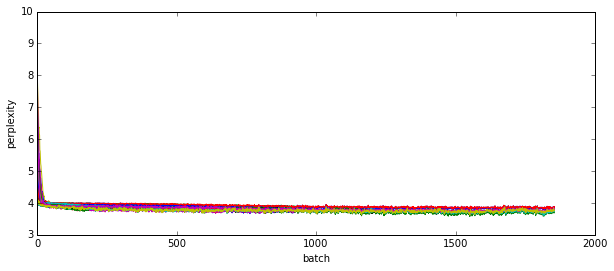

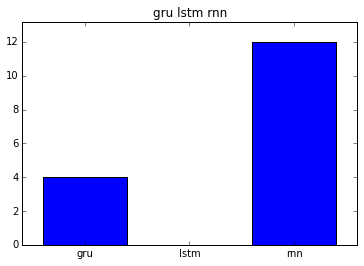

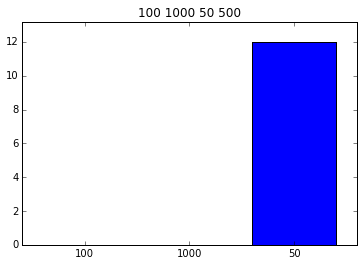

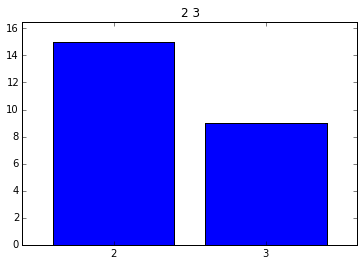

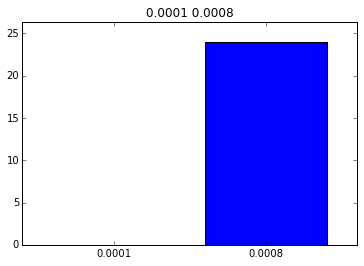

In [135]:
maps,X = plot_tls_from_dir('ecoligenome')
choose_best_parameters(maps,X)

('rnn_100_3_0.0001', 2.9385979100742547) 2.93859791007


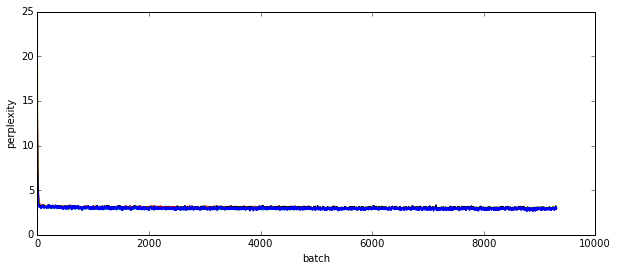

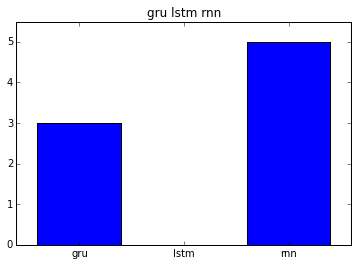

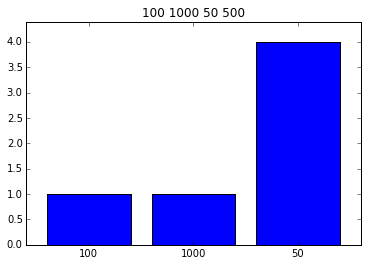

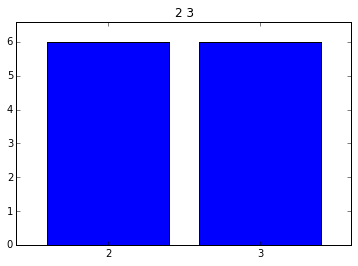

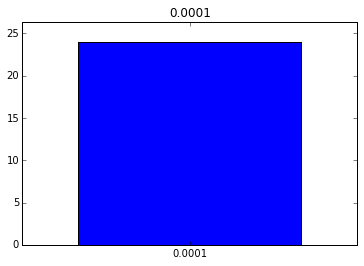

In [136]:
maps,X = plot_tls_from_dir('malariagenome')
choose_best_parameters(maps,X)